In [1]:
import numpy as np

### Tensors

In [2]:
import torch

#### Создание

In [3]:
np_array = np.ones((2, 3, 4))
tensor = torch.from_numpy(np_array)

In [4]:
tensor = torch.Tensor(np_array)

In [5]:
ones = torch.ones((4, 5))

In [6]:
random_noise = torch.randn((4, 5))

#### Операции

In [7]:
tensor.matmul(random_noise)

tensor([[[-0.2058, -0.5395,  1.3968,  0.3095, -1.1482],
         [-0.2058, -0.5395,  1.3968,  0.3095, -1.1482],
         [-0.2058, -0.5395,  1.3968,  0.3095, -1.1482]],

        [[-0.2058, -0.5395,  1.3968,  0.3095, -1.1482],
         [-0.2058, -0.5395,  1.3968,  0.3095, -1.1482],
         [-0.2058, -0.5395,  1.3968,  0.3095, -1.1482]]])

In [8]:
tensor * torch.randn(tensor.size())

tensor([[[ 0.9890, -0.6741, -1.4487, -1.8316],
         [-0.2505, -0.9976, -0.2403, -1.0570],
         [ 0.4739,  0.0712,  1.0556,  0.0382]],

        [[-2.2617,  0.7725, -0.3195, -0.0107],
         [ 1.4274, -0.8164, -1.2990,  2.2315],
         [-0.3798, -1.3372,  0.9657, -0.5033]]])

In [9]:
tensor = torch.Tensor(np_array)
tensor.mul_(torch.randn(tensor.size()))
print(tensor)

tensor([[[-0.3009, -1.3345,  0.6912,  0.5324],
         [-1.5525, -0.5960,  0.2536,  0.1557],
         [-1.1714, -0.8189, -1.3273,  0.2471]],

        [[ 1.3186,  0.4410, -1.0924,  1.4364],
         [-0.7682, -0.9812, -0.4446, -1.2994],
         [ 2.1268, -1.3170, -0.8610,  0.4628]]])


In [10]:
tensor.sum(dim=1)

tensor([[-3.0248, -2.7494, -0.3825,  0.9353],
        [ 2.6771, -1.8572, -2.3980,  0.5998]])

In [11]:
tensor.max(dim=2)

torch.return_types.max(
values=tensor([[ 0.6912,  0.2536,  0.2471],
        [ 1.4364, -0.4446,  2.1268]]),
indices=tensor([[2, 2, 3],
        [3, 2, 0]]))

In [12]:
tensor.max(dim=2).values

tensor([[ 0.6912,  0.2536,  0.2471],
        [ 1.4364, -0.4446,  2.1268]])

#### Индексирование

In [13]:
tensor[1, :, ::2]

tensor([[ 1.3186, -1.0924],
        [-0.7682, -0.4446],
        [ 2.1268, -0.8610]])

In [14]:
tensor[::-1]

ValueError: negative step not yet supported

In [15]:
ids = [0, 1]
tensor[ids]

tensor([[[-0.3009, -1.3345,  0.6912,  0.5324],
         [-1.5525, -0.5960,  0.2536,  0.1557],
         [-1.1714, -0.8189, -1.3273,  0.2471]],

        [[ 1.3186,  0.4410, -1.0924,  1.4364],
         [-0.7682, -0.9812, -0.4446, -1.2994],
         [ 2.1268, -1.3170, -0.8610,  0.4628]]])

In [16]:
tensor[:, ids]

tensor([[[-0.3009, -1.3345,  0.6912,  0.5324],
         [-1.5525, -0.5960,  0.2536,  0.1557]],

        [[ 1.3186,  0.4410, -1.0924,  1.4364],
         [-0.7682, -0.9812, -0.4446, -1.2994]]])

#### Изменение размерности

In [17]:
tensor.view(-1, 2)

tensor([[-0.3009, -1.3345],
        [ 0.6912,  0.5324],
        [-1.5525, -0.5960],
        [ 0.2536,  0.1557],
        [-1.1714, -0.8189],
        [-1.3273,  0.2471],
        [ 1.3186,  0.4410],
        [-1.0924,  1.4364],
        [-0.7682, -0.9812],
        [-0.4446, -1.2994],
        [ 2.1268, -1.3170],
        [-0.8610,  0.4628]])

In [18]:
torch.ones((1, 1, 1)).expand_as(tensor)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [19]:
torch.ones((1, 1, 1)).expand(tensor.size())

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [20]:
tensor.unsqueeze(dim=-1)

tensor([[[[-0.3009],
          [-1.3345],
          [ 0.6912],
          [ 0.5324]],

         [[-1.5525],
          [-0.5960],
          [ 0.2536],
          [ 0.1557]],

         [[-1.1714],
          [-0.8189],
          [-1.3273],
          [ 0.2471]]],


        [[[ 1.3186],
          [ 0.4410],
          [-1.0924],
          [ 1.4364]],

         [[-0.7682],
          [-0.9812],
          [-0.4446],
          [-1.2994]],

         [[ 2.1268],
          [-1.3170],
          [-0.8610],
          [ 0.4628]]]])

### Modules

#### Слои

In [21]:
from torch import nn

In [22]:
module = nn.Linear(32, 4)
x = torch.ones(8, 32)
module(x)

tensor([[-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853],
        [-0.6460,  1.3884,  0.5065,  0.0853]], grad_fn=<AddmmBackward>)

In [23]:
module = nn.Conv2d(in_channels=3, out_channels=1, kernel_size=3, stride=2, padding=0)
x = torch.ones(4, 3, 16, 16)
module(x)

tensor([[[[-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626]]],


        [[[-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626, -0.1626],
          [-0.1626, -

In [24]:
module = nn.LSTM(16, 4)
x = torch.randn(8, 2, 16)
hidden = (torch.zeros(1, 2, 4), torch.zeros(1, 2, 4))
module(x, hidden)

(tensor([[[-0.1006, -0.1243,  0.0887, -0.0364],
          [ 0.4701,  0.3409, -0.0989,  0.0762]],
 
         [[ 0.0332,  0.5084,  0.0742, -0.0320],
          [ 0.0306,  0.2747,  0.0095,  0.2098]],
 
         [[-0.0961, -0.2063,  0.0252, -0.0782],
          [-0.4615,  0.2112, -0.0349,  0.0207]],
 
         [[-0.1228,  0.2185,  0.2231,  0.0074],
          [-0.0503,  0.3854,  0.3831,  0.1057]],
 
         [[ 0.1333,  0.1595,  0.1880,  0.3539],
          [-0.0871,  0.4683,  0.2547,  0.2552]],
 
         [[ 0.1231,  0.7234,  0.2073,  0.1378],
          [-0.0786,  0.3389,  0.0278,  0.3095]],
 
         [[ 0.0199,  0.1680,  0.3040,  0.0913],
          [-0.0908,  0.5981,  0.1196,  0.1241]],
 
         [[-0.1438,  0.0161,  0.1228,  0.1416],
          [-0.0764,  0.2447, -0.0036,  0.2064]]], grad_fn=<StackBackward>),
 (tensor([[[-0.1438,  0.0161,  0.1228,  0.1416],
           [-0.0764,  0.2447, -0.0036,  0.2064]]], grad_fn=<StackBackward>),
  tensor([[[-0.6646,  0.0492,  0.2861,  0.3249],
        

#### Функции активации

In [25]:
module = nn.ReLU()
x = torch.randn(4, 8)
module(x)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.9120, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 1.1568, 1.0758, 0.0000, 0.0000, 0.2487, 0.0138],
        [0.0000, 0.2402, 0.4545, 0.0000, 0.0000, 0.0000, 0.9723, 0.0000],
        [0.4152, 0.2211, 0.0000, 0.1564, 0.2877, 0.0000, 0.7656, 0.0000]])

In [26]:
module = nn.Sigmoid()
x = torch.randn(4, 8) * 2
module(x)

tensor([[0.1008, 0.2789, 0.5763, 0.0465, 0.6777, 0.0482, 0.1968, 0.0551],
        [0.0806, 0.0153, 0.9807, 0.8894, 0.2126, 0.8713, 0.2694, 0.4942],
        [0.1634, 0.0244, 0.3606, 0.0542, 0.5941, 0.9906, 0.5000, 0.2282],
        [0.0121, 0.3260, 0.0314, 0.9062, 0.6882, 0.7826, 0.1844, 0.7205]])

In [27]:
# W, b
# Wx + b
# X \dot W^T + b


module = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 2),
    nn.Softmax(dim=-1)
)
x = torch.randn(32, 4)
module(x)

tensor([[0.5781, 0.4219],
        [0.4567, 0.5433],
        [0.4038, 0.5962],
        [0.4056, 0.5944],
        [0.4548, 0.5452],
        [0.5484, 0.4516],
        [0.5176, 0.4824],
        [0.5082, 0.4918],
        [0.5389, 0.4611],
        [0.5498, 0.4502],
        [0.5227, 0.4773],
        [0.4651, 0.5349],
        [0.5026, 0.4974],
        [0.4944, 0.5056],
        [0.5225, 0.4775],
        [0.4486, 0.5514],
        [0.5048, 0.4952],
        [0.4357, 0.5643],
        [0.4677, 0.5323],
        [0.5429, 0.4571],
        [0.5075, 0.4925],
        [0.4367, 0.5633],
        [0.5236, 0.4764],
        [0.5409, 0.4591],
        [0.5396, 0.4604],
        [0.3840, 0.6160],
        [0.4730, 0.5270],
        [0.3838, 0.6162],
        [0.4182, 0.5818],
        [0.5254, 0.4746],
        [0.5009, 0.4991],
        [0.4189, 0.5811]], grad_fn=<SoftmaxBackward>)

### Optimizers

In [28]:
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt

In [29]:
network = nn.Sequential(
    nn.Linear(4, 512),
    nn.ReLU(),
    nn.Linear(512, 2)
)
x = torch.randn(20000, 4)
y = torch.randint(2, size=(20000,))

In [30]:
optimizer = torch.optim.Adam(network.parameters())

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  5.71it/s]


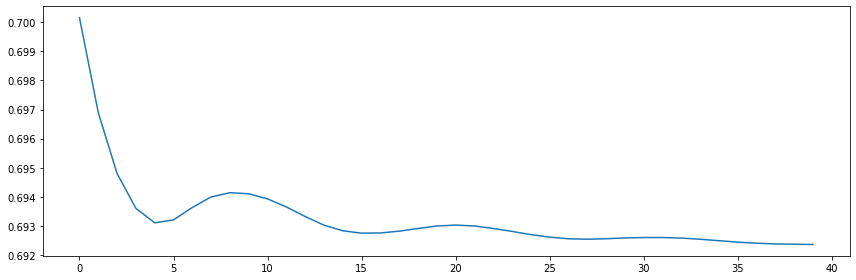

In [31]:
losses = []
for i in tqdm(range(40)):
    y_pred = network(x)
    loss = F.cross_entropy(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.figure(figsize=(12,4))
plt.plot(range(40), losses)
plt.tight_layout()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:06<00:00,  9.16it/s]


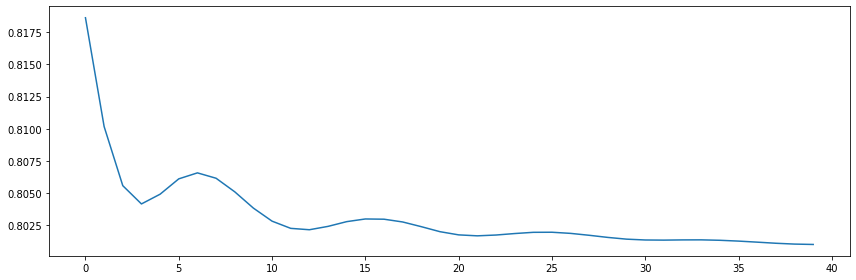

In [109]:
network = nn.Sequential(
    nn.Linear(4, 512),
    nn.ReLU(),
    nn.Linear(512, 2)
)
x = torch.randn(20000, 4)
y = torch.randn(20000, 2)

optimizer = torch.optim.Adam(network.parameters())

losses = []
for i in tqdm(range(40)):
    y_pred = network(x)
    loss = (y - y_pred).abs().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

plt.figure(figsize=(12,4))
plt.plot(range(40), losses)
plt.tight_layout()
plt.show()

### GPU

In [110]:
torch.randn(32, 32).cuda()

tensor([[-0.2838,  1.8130,  1.0861,  ...,  0.7150,  0.2744, -0.4177],
        [-0.7369, -0.4345,  1.0806,  ..., -0.6437, -2.0891, -1.5492],
        [ 0.3744,  0.7226, -1.2852,  ..., -0.2159, -0.8410, -1.1127],
        ...,
        [ 0.7133, -0.9010,  0.6136,  ..., -0.8554, -1.4391,  0.1963],
        [ 0.3922, -0.6315, -0.8124,  ..., -0.4189,  0.8195,  0.3393],
        [ 0.7494,  0.7692, -0.7456,  ...,  0.8925,  1.1009,  0.5313]],
       device='cuda:0')

In [111]:
torch.randn(32, 32).cuda() * torch.randn(32, 32)

RuntimeError: expected device cuda:0 and dtype Float but got device cpu and dtype Float

In [113]:
tensor = torch.randn(32, 32)
tensor.cuda() #not inplace
tensor

tensor([[ 4.8918e-01, -1.4155e+00,  6.7461e-01,  ..., -7.3037e-01,
          6.9769e-01, -6.3727e-01],
        [-4.4008e-01, -2.8938e+00, -7.7275e-02,  ...,  8.0814e-02,
         -4.6978e-01,  1.3513e+00],
        [ 1.1136e+00, -1.5201e-01,  6.6154e-01,  ...,  1.6172e-01,
         -1.2437e+00,  1.9391e-02],
        ...,
        [ 1.8621e+00, -1.5164e+00, -5.8971e-03,  ...,  8.6902e-01,
         -1.3829e+00, -9.3980e-01],
        [-1.6824e+00,  2.8938e-01,  1.1952e-03,  ...,  1.5596e+00,
          4.0327e-01, -1.5363e+00],
        [-3.6657e-01, -4.0444e-01, -4.6399e-02,  ...,  7.5593e-01,
         -7.6957e-02, -3.8743e-01]])

In [112]:
network = nn.Sequential(
    nn.Linear(4, 512),
    nn.ReLU(),
    nn.Linear(512, 2),
    nn.Softmax(dim=-1)
)
network.cuda() # inplace

Sequential(
  (0): Linear(in_features=4, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=2, bias=True)
  (3): Softmax(dim=-1)
)